In [2]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [3]:
#load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
# Load the training and test split of the fashion dataset
(training_images, training_labels), (test_images, test_lables) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   5   0   0  70  71  84  81  73  38   7   0   0  27  36  39   4   0   1]
 [  0   0   0   0   0   0   0   0   0   0   4   0  44 223 180 209 200 183 165 183 148 175 207 183 193 115   0   4]
 [  0   0   0   0   0   0   0   0   0   0   4   0  72 177 169 180 183 180 186 203 193 190 175 171 179 147   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0 109 174 169 175 176 179 170 187 192 201 195 184 181 176   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 170 177 172 177 181 175 185 192 188 175 180 181 183 179   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   9

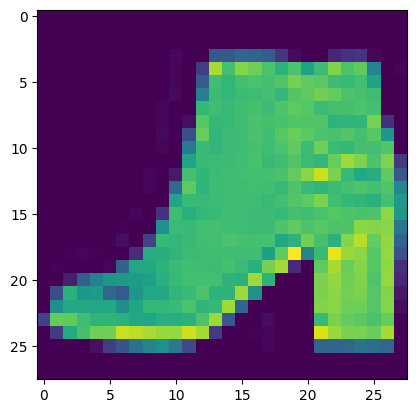

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# we can put b/w 0-59999 here
index = 4560

# set number of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY: \n {training_images[index]}')

# visualize the image
plt.imshow(training_images[index])

In [6]:
# Normalize the pixel values of train and test images (0-1) range
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
# Declare sample inputs and conveert to a tensor
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'Input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'Output of softmax function: {outputs.numpy()}')

# Get the sumof all the values after the softmax
sum = tf.reduce_sum(outputs)
print(f'Sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'Class with highest probability: {prediction}')

Input to softmax function: [[1. 3. 4. 2.]]
Output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
Sum of outputs: 1.0
Class with highest probability: 2


In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5051 - accuracy: 0.8217
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3763 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3146 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8909


In [13]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8679


[0.36590713262557983, 0.867900013923645]